In [1]:
from datetime import datetime, timedelta
import pandas as pd
import geopandas as gpd
import json
import mapclassify
import matplotlib.pyplot as plt
import numpy as np
import os
import requests
from io import StringIO
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)
np.set_printoptions(threshold=np.inf)
from IPython.display import clear_output

### Age and Sex Data

In [2]:
# loading age_sex data at census tract granularity
a_s = pd. read_csv("C:/Users/sreya/Desktop/census_NYC/age_sex.csv")
age_sex = pd.DataFrame(a_s)
age_sex.head()

,Geography,Geographic Area Name,Estimate!!Total!!Total population,Annotation of Estimate!!Total!!Total population,Estimate!!Total!!Total population!!AGE!!Under 5 years,Margin of Error!!Total!!Total population!!AGE!!Under 5 years,Annotation of Margin of Error!!Total!!Total population!!AGE!!Under 5 years,Annotation of Estimate!!Total!!Total population!!AGE!!Under 5 years,Estimate!!Total!!Total population!!AGE!!5 to 9 years,Margin of Error!!Total!!Total population!!AGE!!5 to 9 years,Annotation of Margin of Error!!Total!!Total population!!AGE!!5 to 9 years,Annotation of Estimate!!Total!!Total population!!AGE!!5 to 9 years,Estimate!!Total!!Total population!!AGE!!10 to 14 years,Margin of Error!!Total!!Total population!!AGE!!10 to 14 years,Annotation of Margin of Error!!Total!!Total population!!AGE!!10 to 14 years,Annotation of Estimate!!Total!!Total population!!AGE!!10 to 14 years,Estimate!!Total!!Total population!!AGE!!15 to 19 years,Margin of Error!!Total!!Total population!!AGE!!15 to 19 years,Annotation of Margin of Error!!Total!!Total population!!AGE!!15 to 19 years,Annotation of Estimate!!Total!!Total population!!AGE!!15 to 19 years,Estimate!!Total!!Total population!!AGE!!20 to 24 years,Annotation of Estimate!!Total!!Total population!!AGE!!20 to 24 years,Margin of Error!!Total!!Total population!!AGE!!20 to 24 years,Annotation of Margin of Error!!Total!!Total population!!AGE!!20 to 24 years,Estimate!!Total!!Total population!!AGE!!25 to 29 years,Margin of Error!!Total!!Total population!!AGE!!25 to 29 years,Annotation of Margin of Error!!Total!!Total population!!AGE!!25 to 29 years,Annotation of Estimate!!Total!!Total population!!AGE!!25 to 29 years,Estimate!!Total!!Total population!!AGE!!30 to 34 years,Margin of Error!!Total!!Total population!!AGE!!30 to 34 years,Annotation of Margin of Error!!Total!!Total population!!AGE!!30 to 34 years,Annotation of Estimate!!Total!!Total population!!AGE!!30 to 34 years,Estimate!!Total!!Total population!!AGE!!35 to 39 years,Margin of Error!!Total!!Total population!!AGE!!35 to 39 years,Annotation of Margin of Error!!Total!!Total population!!AGE!!35 to 39 years,Annotation of Estimate!!Total!!Total population!!AGE!!35 to 39 years,Estimate!!Total!!Total population!!AGE!!40 to 44 years,Margin of Error!!Total!!Total population!!AGE!!40 to 44 years,Annotation of Margin of Error!!Total!!Total population!!AGE!!40 to 44 years,Annotation of Estimate!!Total!!Total population!!AGE!!40 to 44 years,Estimate!!Total!!Total population!!AGE!!45 to 49 years,Margin of Error!!Total!!Total population!!AGE!!45 to 49 years,Annotation of Margin of Error!!Total!!Total population!!AGE!!45 to 49 years,Annotation of Estimate!!Total!!Total population!!AGE!!45 to 49 years,Estimate!!Total!!Total population!!AGE!!50 to 54 years,Margin of Error!!Total!!Total population!!AGE!!50 to 54 years,Annotation of Margin of Error!!Total!!Total population!!AGE!!50 to 54 years,Annotation of Estimate!!Total!!Total population!!AGE!!50 to 54 years,Estimate!!Total!!Total population!!AGE!!55 to 59 years,Margin of Error!!Total!!Total population!!AGE!!55 to 59 years,Annotation of Margin of Error!!Total!!Total population!!AGE!!55 to 59 years,Annotation of Estimate!!Total!!Total population!!AGE!!55 to 59 years,Estimate!!Total!!Total population!!AGE!!60 to 64 years,Annotation of Estimate!!Total!!Total population!!AGE!!60 to 64 years,Margin of Error!!Total!!Total population!!AGE!!60 to 64 years,Annotation of Margin of Error!!Total!!Total population!!AGE!!60 to 64 years,Estimate!!Total!!Total population!!AGE!!65 to 69 years,Annotation of Estimate!!Total!!Total population!!AGE!!65 to 69 years,Margin of Error!!Total!!Total population!!AGE!!65 to 69 years,Annotation of Margin of Error!!Total!!Total population!!AGE!!65 to 69 years,Estimate!!Total!!Total population!!AGE!!70 to 74 years,Annotation of Estimate!!Total!!Total population!!AGE!!70 to 74 years,Margin of Error!!Total!!Total population!!AGE!!70 to 74 years,Annotation of Margin of Error!!Total!!Total 

In [3]:
age_sex.shape

(2327, 912)

In [4]:
# Dropping columns containing the string 'age' in their names
c1 = age_sex.columns[age_sex.columns.str.contains('Annotation of Estimate')]
c2 = age_sex.columns[age_sex.columns.str.contains('Margin of Error')]
columns_to_drop = c1.append(c2)
age_sex.drop(columns=columns_to_drop, inplace=True)
age_sex.shape

(2327, 230)

In [5]:
a_s_final = age_sex.iloc[:,0:21]
a_s_final.head()

,Geography,Geographic Area Name,Estimate!!Total!!Total population,Estimate!!Total!!Total population!!AGE!!Under 5 years,Estimate!!Total!!Total population!!AGE!!5 to 9 years,Estimate!!Total!!Total population!!AGE!!10 to 14 years,Estimate!!Total!!Total population!!AGE!!15 to 19 years,Estimate!!Total!!Total population!!AGE!!20 to 24 years,Estimate!!Total!!Total population!!AGE!!25 to 29 years,Estimate!!Total!!Total population!!AGE!!30 to 34 years,Estimate!!Total!!Total population!!AGE!!35 to 39 years,Estimate!!Total!!Total population!!AGE!!40 to 44 years,Estimate!!Total!!Total population!!AGE!!45 to 49 years,Estimate!!Total!!Total population!!AGE!!50 to 54 years,Estimate!!Total!!Total population!!AGE!!55 to 59 years,Estimate!!Total!!Total population!!AGE!!60 to 64 years,Estimate!!Total!!Total population!!AGE!!65 to 69 years,Estimate!!Total!!Total population!!AGE!!70 to 74 years,Estimate!!Total!!Total population!!AGE!!75 to 79 years,Estimate!!Total!!Total population!!AGE!!80 to 84 years,Estimate!!Total!!Total population!!AGE!!85 years and over
0,1400000US36005000100,"Census Tract 1, Bronx County, New York",6661,0,0,0,372,732,1073,1012,1181,774,564,494,279,90,82,0,8,0,0
1,1400000US36005000200,"Census Tract 2, Bronx County, New York",4453,241,258,410,241,276,334,275,380,345,318,223,69,257,177,238,191,126,94
2,1400000US36005000400,"Census Tract 4, Bronx County, New York",6000,180,324,204,497,361,688,452,304,429,455,460,388,325,545,146,54,83,105
3,1400000US36005001600,"Census Tract 16, Bronx County, New York",6038,263,308,334,617,521,438,224,238,327,376,448,462,325,373,281,187,167,149
4,1400000US36005001901,"Census Tract 19.01, Bronx County, New York",2168,188,105,172,102,81,251,295,251,153,189,169,80,99,0,30,0,3,0


In [6]:
# Remove common prefix 'prefix_' from column names
common_prefix = 'Estimate!!Total!!Total population!!AGE!!'
renamed_columns = {col: col.replace(common_prefix, '') for col in a_s_final.columns}
a_s_final = a_s_final.rename(columns=renamed_columns)

In [7]:
# Remove common prefix 'prefix_' from column names
common_prefix = 'Estimate!!Total!!'
renamed_columns = {col: col.replace(common_prefix, '') for col in a_s_final.columns}
a_s_final = a_s_final.rename(columns=renamed_columns)

In [8]:
# adding a prefix to column names
# addding d_ as a prefix to indicate demographic data
prefix = 'd_'
a_s_final = a_s_final.add_prefix(prefix)

In [9]:
a_s_final.head()

,d_Geography,d_Geographic Area Name,d_Total population,d_Under 5 years,d_5 to 9 years,d_10 to 14 years,d_15 to 19 years,d_20 to 24 years,d_25 to 29 years,d_30 to 34 years,d_35 to 39 years,d_40 to 44 years,d_45 to 49 years,d_50 to 54 years,d_55 to 59 years,d_60 to 64 years,d_65 to 69 years,d_70 to 74 years,d_75 to 79 years,d_80 to 84 years,d_85 years and over
0,1400000US36005000100,"Census Tract 1, Bronx County, New York",6661,0,0,0,372,732,1073,1012,1181,774,564,494,279,90,82,0,8,0,0
1,1400000US36005000200,"Census Tract 2, Bronx County, New York",4453,241,258,410,241,276,334,275,380,345,318,223,69,257,177,238,191,126,94
2,1400000US36005000400,"Census Tract 4, Bronx County, New York",6000,180,324,204,497,361,688,452,304,429,455,460,388,325,545,146,54,83,105
3,1400000US36005001600,"Census Tract 16, Bronx County, New York",6038,263,308,334,617,521,438,224,238,327,376,448,462,325,373,281,187,167,149
4,1400000US36005001901,"Census Tract 19.01, Bronx County, New York",2168,188,105,172,102,81,251,295,251,153,189,169,80,99,0,30,0,3,0


In [10]:
sex_final = age_sex[['Geography','Estimate!!Male!!Total population','Estimate!!Female!!Total population' ]]
sex_final.head()

,Geography,Estimate!!Male!!Total population,Estimate!!Female!!Total population
0,1400000US36005000100,6177,484
1,1400000US36005000200,2476,1977
2,1400000US36005000400,3014,2986
3,1400000US36005001600,2512,3526
4,1400000US36005001901,993,1175


In [11]:
# Remove common prefix 'prefix_' from column names
common_prefix = 'Estimate!!'
renamed_columns = {col: col.replace(common_prefix, '') for col in a_s_final.columns}
sex_final = sex_final.rename(columns=renamed_columns)


# adding d_ as prefix
prefix = 'd_'
sex_final = sex_final.add_prefix(prefix)

In [12]:
final_age_sex = pd.merge(sex_final, a_s_final, on ='d_Geography', how= 'inner')

In [13]:
final_age_sex.head()

# age and sex columns - 23 comlumns in total

,d_Geography,d_Estimate!!Male!!Total population,d_Estimate!!Female!!Total population,d_Geographic Area Name,d_Total population,d_Under 5 years,d_5 to 9 years,d_10 to 14 years,d_15 to 19 years,d_20 to 24 years,d_25 to 29 years,d_30 to 34 years,d_35 to 39 years,d_40 to 44 years,d_45 to 49 years,d_50 to 54 years,d_55 to 59 years,d_60 to 64 years,d_65 to 69 years,d_70 to 74 years,d_75 to 79 years,d_80 to 84 years,d_85 years and over
0,1400000US36005000100,6177,484,"Census Tract 1, Bronx County, New York",6661,0,0,0,372,732,1073,1012,1181,774,564,494,279,90,82,0,8,0,0
1,1400000US36005000200,2476,1977,"Census Tract 2, Bronx County, New York",4453,241,258,410,241,276,334,275,380,345,318,223,69,257,177,238,191,126,94
2,1400000US36005000400,3014,2986,"Census Tract 4, Bronx County, New York",6000,180,324,204,497,361,688,452,304,429,455,460,388,325,545,146,54,83,105
3,1400000US36005001600,2512,3526,"Census Tract 16, Bronx County, New York",6038,263,308,334,617,521,438,224,238,327,376,448,462,325,373,281,187,167,149
4,1400000US36005001901,993,1175,"Census Tract 19.01, Bronx County, New York",2168,188,105,172,102,81,251,295,251,153,189,169,80,99,0,30,0,3,0


In [14]:
string = "1400000US36005000100"
final_age_sex["GEOID"] = final_age_sex["d_Geography"].str.slice(-11)
final_age_sex.head()

demo_final = final_age_sex.iloc[:,1:25]
# demo_final.head()

In [15]:
column_list = final_age_sex.columns.to_list()
print(column_list)

['d_Geography', 'd_Estimate!!Male!!Total population', 'd_Estimate!!Female!!Total population', 'd_Geographic Area Name', 'd_Total population', 'd_Under 5 years', 'd_5 to 9 years', 'd_10 to 14 years', 'd_15 to 19 years', 'd_20 to 24 years', 'd_25 to 29 years', 'd_30 to 34 years', 'd_35 to 39 years', 'd_40 to 44 years', 'd_45 to 49 years', 'd_50 to 54 years', 'd_55 to 59 years', 'd_60 to 64 years', 'd_65 to 69 years', 'd_70 to 74 years', 'd_75 to 79 years', 'd_80 to 84 years', 'd_85 years and over', 'GEOID']


In [16]:
# Create a dictionary mapping old column names to new column names
column_mapping = {'d_Estimate!!Male!!Total population': 'd_tot_male_pop', 'd_Estimate!!Female!!Total population': 'd_tot_female_pop'}

# Rename the columns in the DataFrame
final_age_sex = final_age_sex.rename(columns=column_mapping)

In [17]:
# Specify the new column order
new_column_order = ['GEOID', 'd_Geographic Area Name','d_Total population', 'd_tot_male_pop','d_tot_female_pop', 'd_Under 5 years', 'd_5 to 9 years', 'd_10 to 14 years', 'd_15 to 19 years', 'd_20 to 24 years', 'd_25 to 29 years', 'd_30 to 34 years', 'd_35 to 39 years', 'd_40 to 44 years', 'd_45 to 49 years', 'd_50 to 54 years', 'd_55 to 59 years', 'd_60 to 64 years', 'd_65 to 69 years', 'd_70 to 74 years', 'd_75 to 79 years', 'd_80 to 84 years', 'd_85 years and over' ]

# Reassign the DataFrame with the new column order
demo_final = final_age_sex[new_column_order]

In [18]:
demo_final.head()

,GEOID,d_Geographic Area Name,d_Total population,d_tot_male_pop,d_tot_female_pop,d_Under 5 years,d_5 to 9 years,d_10 to 14 years,d_15 to 19 years,d_20 to 24 years,d_25 to 29 years,d_30 to 34 years,d_35 to 39 years,d_40 to 44 years,d_45 to 49 years,d_50 to 54 years,d_55 to 59 years,d_60 to 64 years,d_65 to 69 years,d_70 to 74 years,d_75 to 79 years,d_80 to 84 years,d_85 years and over
0,36005000100,"Census Tract 1, Bronx County, New York",6661,6177,484,0,0,0,372,732,1073,1012,1181,774,564,494,279,90,82,0,8,0,0
1,36005000200,"Census Tract 2, Bronx County, New York",4453,2476,1977,241,258,410,241,276,334,275,380,345,318,223,69,257,177,238,191,126,94
2,36005000400,"Census Tract 4, Bronx County, New York",6000,3014,2986,180,324,204,497,361,688,452,304,429,455,460,388,325,545,146,54,83,105
3,36005001600,"Census Tract 16, Bronx County, New York",6038,2512,3526,263,308,334,617,521,438,224,238,327,376,448,462,325,373,281,187,167,149
4,36005001901,"Census Tract 19.01, Bronx County, New York",2168,993,1175,188,105,172,102,81,251,295,251,153,189,169,80,99,0,30,0,3,0


### Race, income, and occupancy data

In [20]:
# Create tables dictionary from https://api.census.gov/data/2019/acs/acs5/subject/variables.html
column_codes_ct = {
    'B01001_001E':'total_population',
    'B03002_003E':'white_no_lat',
    'B03002_004E':'black_no_lat',
    'B03002_005E':'native_no_lat',
    'B03002_006E':'asian_no_lat',
    'B03002_007E':'pacific_no_lat',
    'B03002_008E':'other_race_no_lat',
    'B03002_009E':'two_or_more_no_lat',
    'B01001I_001E':'hispanic_or_latino',
    'B01001_002E':'males',
    'B01002_001E':'median_age',
    'B19001_001E':'household_number',
    'B11001_002E':'family_households_number',
    'B06011_001E':'median_income', 
    'B19083_001E':'gini_index',
    'B08303_001E':'total_workers',
    'B17001_001E':'poverty_status',
    'B19083_001E':'gini_income_ineq',
    'B19301_001E':'income_per_capita',
}



def collect_acs_data(year, states, tables, geo_unit):
    
    acs_data = pd.DataFrame()
    base_API_url = f'https://api.census.gov/data/2019/acs/acs5?'
        
    state = '36_NEW_YORK'
    state_code, state_name = state.split('_', maxsplit=1)
      
    columns = ','.join(list(tables.keys()))
    #print(columns)
            
            
    if geo_unit=='ct':
        query = base_API_url + f'get={columns}&for=tract:*&in=state:{state_code}&in=county:*'
            
# #            query = f'{base_API_url}get={columns}&for=tract:*&in=state:{state_code}&in=county:*'

    with requests.get(query) as response:
        data = json.loads(response.content)
        
    temp_df = pd.DataFrame.from_records(data[1:], columns=data[0])
    
    ##################return temp_df

# generate GEOID
    if geo_unit=='ct':
        temp_df['GEOID'] = [str(state) + str(county) + str(tract) \
                            for state, county, tract in zip(temp_df['state'], 
                                                            temp_df['county'], 
                                                            temp_df['tract'])
                           ]

            
#             # rename columns
    temp_df.rename(columns=tables, inplace=True)
    
    ###################################return temp_df
            
#             # create vintage column
    temp_df['year'] = year
    
    #return temp_df

#             # append to main DF
    acs_data = acs_data.append(temp_df)
            
#             # append to main DF
    clear_output(wait=True)
    
#     # clean main DF
    acs_data.reset_index(drop=True, inplace=True)
    acs_data.fillna(np.nan, inplace=True)
    
    ####################return acs_data
    
#     # convert eligible columns to numeric
    for c in acs_data[tables.values()]:
        acs_data[c] = pd.to_numeric(acs_data[c], errors='coerce')

    return acs_data # return main DF


my_acs_data = collect_acs_data(2019, '36_NEW_YORK', column_codes_ct, 'ct')

In [21]:
my_acs_data.shape

(4918, 23)

In [24]:
my_acs_data.head()

,total_population,white_no_lat,black_no_lat,native_no_lat,asian_no_lat,pacific_no_lat,other_race_no_lat,two_or_more_no_lat,hispanic_or_latino,males,median_age,household_number,family_households_number,median_income,gini_income_ineq,total_workers,poverty_status,income_per_capita,state,county,tract,GEOID,year
0,3563,1442,1365,42,251,0,18,265,180,1702,28.6,1820,755,22274,0.4859,1587,3542,19454.0,36,067,005500,36067005500,2019
1,1599,1284,82,0,93,0,0,28,112,747,39.4,694,379,45585,0.4166,947,1569,43884.0,36,067,005601,36067005601,2019
2,1842,994,321,45,302,0,0,126,54,863,52.6,1305,237,19369,0.4822,650,1842,21846.0,36,067,006102,36067006102,2019
3,3844,3477,128,0,57,0,0,33,149,1838,37.5,1507,977,33720,0.3560,1918,3844,30423.0,36,067,011201,36067011201,2019
4,3950,2215,543,45,672,0,8,115,352,1481,19.8,63,4,6978,0.5609,1077,198,10948.0,36,067,005602,36067005602,2019


In [25]:
# merging age_sex & race+ income datasets

final_demo = pd.merge(demo_final,my_acs_data, on= "GEOID", how='inner' )

In [26]:
final_demo = final_demo.drop('year', axis=1)

In [27]:
final_demo.head()

#shape (2036, 44)

,GEOID,d_Geographic Area Name,d_Total population,d_tot_male_pop,d_tot_female_pop,d_Under 5 years,d_5 to 9 years,d_10 to 14 years,d_15 to 19 years,d_20 to 24 years,d_25 to 29 years,d_30 to 34 years,d_35 to 39 years,d_40 to 44 years,d_45 to 49 years,d_50 to 54 years,d_55 to 59 years,d_60 to 64 years,d_65 to 69 years,d_70 to 74 years,d_75 to 79 years,d_80 to 84 years,d_85 years and over,total_population,white_no_lat,black_no_lat,native_no_lat,asian_no_lat,pacific_no_lat,other_race_no_lat,two_or_more_no_lat,hispanic_or_latino,males,median_age,household_number,family_households_number,median_income,gini_income_ineq,total_workers,poverty_status,income_per_capita,state,county,tract
0,36005000100,"Census Tract 1, Bronx County, New York",6661,6177,484,0,0,0,372,732,1073,1012,1181,774,564,494,279,90,82,0,8,0,0,6864,603,3601,18,181,0,19,35,2407,6345,35.0,0,0,11144,-6.666667e+08,0,0,3341.0,36,005,000100
1,36005000200,"Census Tract 2, Bronx County, New York",4453,2476,1977,241,258,410,241,276,334,275,380,345,318,223,69,257,177,238,191,126,94,4532,33,920,0,75,0,60,0,3444,2193,39.3,1342,963,27527,4.460000e-01,1523,4532,22015.0,36,005,000200
2,36005000400,"Census Tract 4, Bronx County, New York",6000,3014,2986,180,324,204,497,361,688,452,304,429,455,460,388,325,545,146,54,83,105,5516,387,1264,0,121,0,9,74,3661,2810,41.2,2042,1390,40387,4.141000e-01,2782,5503,37619.0,36,005,000400
3,36005001600,"Census Tract 16, Bronx County, New York",6038,2512,3526,263,308,334,617,521,438,224,238,327,376,448,462,325,373,281,187,167,149,5825,213,2021,0,64,0,50,25,3452,2422,33.7,1971,1379,18519,5.881000e-01,1983,5603,22577.0,36,005,001600
4,36005002300,"Census Tract 23, Bronx County, New York",4465,2180,2285,205,275,347,285,389,248,298,149,246,198,417,486,344,170,85,163,94,66,4302,1,1192,16,0,0,24,7,3062,1960,35.8,1914,1060,12110,4.674000e-01,1338,4301,13715.0,36,005,002300


In [28]:
# imputing Nan values with 0
final_demo = final_demo.fillna(0)


TO DO: 

1. spatial join with census tract
2. roll up to NTA  (gdrive- hsapefiles)
3. 

### Spatial join with 2010_census tract (centract10)

In [29]:
# spatial join with census tract json

#  # Census Tracts
params_census = {
    '$limit': 5000  # Limit the number of records, adjust as needed
}
census_url = 'https://data.cityofnewyork.us/resource/nahe-je7c.geojson'
# https://data.cityofnewyork.us/Housing-Development/Housing-Database-by-Census-Tract-Map-/qsh3-jj2w

In [30]:
census_response = requests.get(census_url, params=params_census)
census_json = census_response.json()
census_gdf = gpd.GeoDataFrame.from_features(census_json['features'])
print(len(census_gdf))
census_gdf.head()

2165


,geometry,comp2016,centract10,cenunits10,shape_area,comp2018,comp2011,comp2010,comp2019,withdrawn,total,objectid,comp2010ap,comp2014,adjunits10,comp2020,shape_length,comp2013,inactive,boro,permitted,comp2015,totaladj,approved,comp2012,comp2017,filed,bct2010
0,"MULTIPOLYGON (((-73.95841 40.80743, -73.95913 ...",None,36061020101,313,593177.018676758,None,None,-28,None,None,285,1688,-28,None,313,None,3329.67845957574,None,None,Manhattan,None,None,285,None,None,None,None,1020101
1,"MULTIPOLYGON (((-73.95720 40.78019, -73.95770 ...",None,36061015001,1256,556354.405044556,None,None,0,11,16,1256,663,0,None,1256,-8,3124.39320903527,-10,-1,Manhattan,0,None,1256,0,None,7,12,1015001
2,"MULTIPOLYGON (((-73.94574 40.61537, -73.94658 ...",0,36047075600,758,1867819.4258728,None,0,0,None,0,753,223,None,-1,758,None,5582.96531621297,-2,1,Brooklyn,-1,0,753,0,-2,0,0,3075600
3,"MULTIPOLYGON (((-73.96094 40.62280, -73.96049 ...",0,36047053400,1479,1866105.77261353,0,None,None,None,0,1479,164,None,None,1479,None,5639.95131416622,0,-1,Brooklyn,3,None,1479,0,0,None,None,3053400
4,"MULTIPOLYGON (((-73.89723 40.66589, -73.89816 ...",None,36047113400,786,1651198.22203064,None,96,None,None,None,882,283,None,None,786,0,5266.48479663589,None,None,Brooklyn,12,None,882,2,0,None,259,3113400


<Axes: >

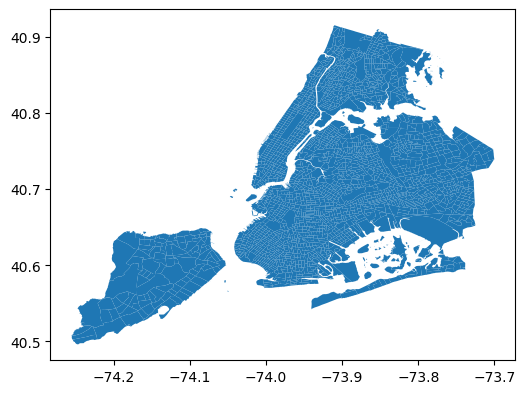

In [31]:
census_gdf.plot(figsize=(6,6))

### Creating  centroids from census tracts

In [36]:
# Create centroids
centroids = census_gdf.centroid

# Add centroids to census tract shapefile
census_gdf['centroid'] = centroids

# Save centroids to new shapefile
centroids.to_file('C:/Users/sreya/Desktop/census_NYC/centroids.shp')

In [37]:
centroid_path = 'C:/Users/sreya/Desktop/census_NYC/centroids.shp'
centroid_gpd = gpd.read_file(centroid_path)

<Axes: >

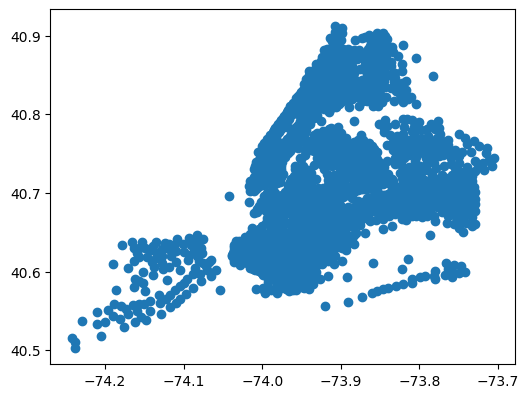

In [38]:
centroid_gpd.plot(figsize=(6,6))

In [39]:
centroid_gpd.head()

,FID,geometry
0,0,POINT (-73.96021 40.80644)
1,1,POINT (-73.95928 40.78020)
2,2,POINT (-73.94799 40.61686)
3,3,POINT (-73.96283 40.62259)
4,4,POINT (-73.89961 40.66779)


In [32]:
#  using centract10 as key for merge
ct_acs = census_gdf.merge(final_demo, left_on='centract10', right_on = 'GEOID', how= 'outer')

In [33]:
ct_acs.centract10.nunique()

2165

In [34]:
# Drop rows with NaN, None, or 0 values in column 'centract10'

for_NTA_acs = ct_acs[ct_acs['centract10'].notna() & ct_acs['centract10'].ne(0)]

In [35]:
for_NTA_acs.shape

# shape desired for NTA

(2165, 72)

In [40]:
# Create centroids
centroids_acs = for_NTA_acs.centroid

# Add centroids to census tract shapefile
for_NTA_acs['centroid'] = centroids

# Save centroids to new shapefile
centroids_acs.to_file('C:/Users/sreya/Desktop/census_NYC/centroids_acs.shp')

In [41]:
centroid_acs = 'C:/Users/sreya/Desktop/census_NYC/centroids_acs.shp'
centroid_gpd = gpd.read_file(centroid_acs)

<Axes: >

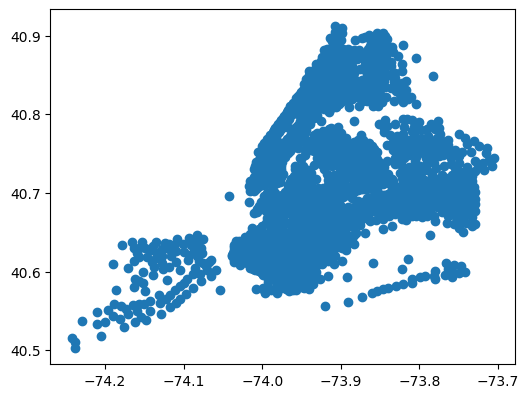

In [42]:
centroid_gpd.plot(figsize=(6,6))

In [59]:
centroid_gpd.head()

,FID,geometry
0,0,POINT (-73.96021 40.80644)
1,1,POINT (-73.95928 40.78020)
2,2,POINT (-73.94799 40.61686)
3,3,POINT (-73.96283 40.62259)
4,4,POINT (-73.89961 40.66779)


In [60]:
for_NTA_acs.head()

,geometry,comp2016,centract10,cenunits10,shape_area,comp2018,comp2011,comp2010,comp2019,withdrawn,total,objectid,comp2010ap,comp2014,adjunits10,comp2020,shape_length,comp2013,inactive,boro,permitted,comp2015,totaladj,approved,comp2012,comp2017,filed,bct2010,GEOID,d_Geographic Area Name,d_Total population,d_tot_male_pop,d_tot_female_pop,d_Under 5 years,d_5 to 9 years,d_10 to 14 years,d_15 to 19 years,d_20 to 24 years,d_25 to 29 years,d_30 to 34 years,d_35 to 39 years,d_40 to 44 years,d_45 to 49 years,d_50 to 54 years,d_55 to 59 years,d_60 to 64 years,d_65 to 69 years,d_70 to 74 years,d_75 to 79 years,d_80 to 84 years,d_85 years and over,total_population,white_no_lat,black_no_lat,native_no_lat,asian_no_lat,pacific_no_lat,other_race_no_lat,two_or_more_no_lat,hispanic_or_latino,males,median_age,household_number,family_households_number,median_income,gini_income_ineq,total_workers,poverty_status,income_per_capita,state,county,tract,centroid
0,"MULTIPOLYGON (((-73.95841 40.80743, -73.95913 ...",None,36061020101,313,593177.018676758,None,None,-28,None,None,285,1688,-28,None,313,None,3329.67845957574,None,None,Manhattan,None,None,285,None,None,None,None,1020101,36061020101,"Census Tract 201.01, New York County, New York",1859.0,906.0,953.0,40.0,55.0,4.0,245.0,995.0,123.0,56.0,61.0,21.0,23.0,16.0,50.0,65.0,45.0,26.0,21.0,4.0,9.0,1854.0,1110.0,158.0,40.0,320.0,0.0,0.0,41.0,185.0,900.0,21.8,284.0,162.0,16136.0,0.5678,550.0,697.0,40214.0,36,061,020101,POINT (-73.96021 40.80644)
1,"MULTIPOLYGON (((-73.95720 40.78019, -73.95770 ...",None,36061015001,1256,556354.405044556,None,None,0,11,16,1256,663,0,None,1256,-8,3124.39320903527,-10,-1,Manhattan,0,None,1256,0,None,7,12,1015001,36061015001,"Census Tract 150.01, New York County, New York",2001.0,910.0,1091.0,111.0,95.0,175.0,36.0,47.0,185.0,132.0,121.0,65.0,116.0,108.0,82.0,118.0,175.0,192.0,109.0,82.0,52.0,2285.0,1941.0,0.0,0.0,203.0,0.0,0.0,26.0,115.0,1041.0,51.9,1047.0,675.0,86535.0,0.5644,971.0,2285.0,134295.0,36,061,015001,POINT (-73.95928 40.78020)
2,"MULTIPOLYGON (((-73.94574 40.61537, -73.94658 ...",0,36047075600,758,1867819.4258728,None,0,0,None,0,753,223,None,-1,758,None,5582.96531621297,-2,1,Brooklyn,-1,0,753,0,-2,0,0,3075600,36047075600,"Census Tract 756, Kings County, New York",2121.0,1202.0,919.0,148.0,139.0,195.0,129.0,71.0,133.0,92.0,123.0,88.0,157.0,156.0,159.0,96.0,66.0,237.0,16.0,71.0,45.0,2150.0,1708.0,66.0,0.0,228.0,0.0,0.0,6.0,142.0,1143.0,33.9,698.0,479.0,49353.0,0.4650,898.0,2150.0,47126.0,36,047,075600,POINT (-73.94799 40.61686)
3,"MULTIPOLYGON (((-73.96094 40.62280, -73.96049 ...",0,36047053400,1479,1866105.77261353,0,None,None,None,0,1479,164,None,None,1479,None,5639.95131416622,0,-1,Brooklyn,3,None,1479,0,0,None,None,3053400,36047053400,"Census Tract 534, Kings County, New York",4927.0,2389.0,2538.0,480.0,470.0,477.0,379.0,204.0,466.0,174.0,225.0,405.0,205.0,112.0,289.0,266.0,347.0,129.0,86.0,82.0,131.0,4232.0,2437.0,302.0,0.0,907.0,27.0,0.0,263.0,296.0,1992.0,31.2,1280.0,936.0,21274.0,0.5560,1258.0,4039.0,21864.0,36,047,053400,POINT (-73.96283 40.62259)
4,"MULTIPOLYGON (((-73.89723 40.66589, -73.89816 ...",None,36047113400,786,1651198.22203064,None,96,None,None,None,882,283,None,None,786,0,5266.48479663589,None,None,Brooklyn,12,None,882,2,0,None,259,3113400,36047113400,"Census Tract 1134, Kings County, New York",2566.0,1009.0,1557.0,255.0,162.0,143.0,91.0,161.0,245.0,237.0,208.0,143.0,239.0,145.0,108.0,179.0,84.0,63.0,7.0,79.0,17.0,3105.0,50.0,1853.0,0.0,32.0,0.0,98.0,0.0,1072.0,1223.0,31.0,905.0,601.0,16303.0,0.5068,1010.0,3049.0,13932.0,36,047,113400,POINT (-73.89961 40.66779)


In [61]:
for_NTA_acs.shape

(2165, 73)

### Aggregating data to NTA

In [50]:
from geopandas.tools import sjoin

In [44]:
# loading NTA data
shapefile_path = 'C:/Users/sreya/Downloads/nta_2010-20230430T225135Z-001/nta_2010/geo_export_d66993ca-6cc0-4ee0-9b66-052e7675b5f0.shp'
NTA_gdf = gpd.read_file(shapefile_path)

<Axes: >

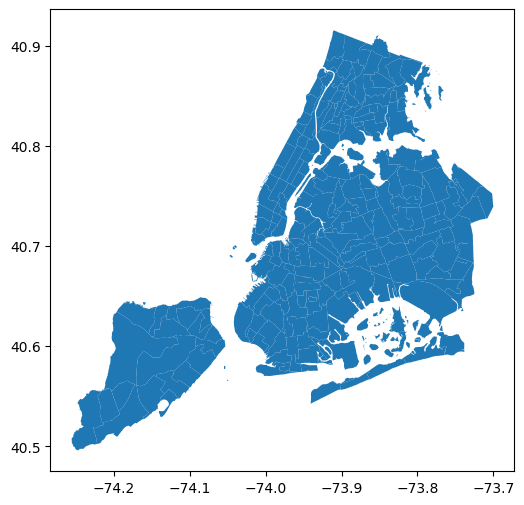

In [45]:
NTA_gdf.plot(figsize=(6,6))

In [46]:
NTA_gdf.shape

(195, 8)

In [47]:
print(NTA_gdf.crs)

GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


In [62]:
# setting crs to both acs and NTA_gdf
NTA_gdf = NTA_gdf.set_crs(4326, allow_override=True)
for_NTA_acs = for_NTA_acs.set_crs(4326, allow_override=True)

In [63]:
# sjoin acs data + NTA
acs_nta = sjoin(NTA_gdf, for_NTA_acs, how='left', op='contains')

In [65]:
acs_nta.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area_left,shape_leng,geometry,index_right,comp2016,centract10,cenunits10,shape_area_right,comp2018,comp2011,comp2010,comp2019,withdrawn,total,objectid,comp2010ap,comp2014,adjunits10,comp2020,shape_length,comp2013,inactive,boro,permitted,comp2015,totaladj,approved,comp2012,comp2017,filed,bct2010,GEOID,d_Geographic Area Name,d_Total population,d_tot_male_pop,d_tot_female_pop,d_Under 5 years,d_5 to 9 years,d_10 to 14 years,d_15 to 19 years,d_20 to 24 years,d_25 to 29 years,d_30 to 34 years,d_35 to 39 years,d_40 to 44 years,d_45 to 49 years,d_50 to 54 years,d_55 to 59 years,d_60 to 64 years,d_65 to 69 years,d_70 to 74 years,d_75 to 79 years,d_80 to 84 years,d_85 years and over,total_population,white_no_lat,black_no_lat,native_no_lat,asian_no_lat,pacific_no_lat,other_race_no_lat,two_or_more_no_lat,hispanic_or_latino,males,median_age,household_number,family_households_number,median_income,gini_income_ineq,total_workers,poverty_status,income_per_capita,state,county,tract,centroid
0,4.0,Queens,081,QN08,St. Albans,7.741275e+07,45401.316803,"POLYGON ((-73.75205 40.70523, -73.75174 40.704...",601.0,1,36081035200,789,6514380.3321228,1,0,0,1,7,803,836,0,4,789,None,13006.6748835929,2,4,Queens,6,2,803,None,4,-1,5,4035200,36081035200,"Census Tract 352, Queens County, New York",2949.0,1222.0,1727.0,192.0,202.0,127.0,262.0,154.0,122.0,216.0,183.0,172.0,113.0,267.0,183.0,375.0,51.0,242.0,31.0,16.0,41.0,2780.0,176.0,2227.0,0.0,80.0,0.0,29.0,69.0,199.0,1197.0,38.8,815.0,602.0,36964.0,0.3971,1301.0,2774.0,30465.0,36,081,035200,POINT (-73.75761 40.67949)
0,4.0,Queens,081,QN08,St. Albans,7.741275e+07,45401.316803,"POLYGON ((-73.75205 40.70523, -73.75174 40.704...",1002.0,1,36081028200,521,1960739.13609314,19,3,None,1,3,548,2015,None,None,521,1,7043.59237379638,2,2,Queens,1,None,548,4,1,-1,4,4028200,36081028200,"Census Tract 282, Queens County, New York",2116.0,900.0,1216.0,274.0,134.0,133.0,156.0,208.0,151.0,71.0,108.0,148.0,167.0,51.0,217.0,133.0,50.0,34.0,12.0,30.0,39.0,1894.0,29.0,1444.0,0.0,87.0,0.0,192.0,50.0,92.0,915.0,36.5,528.0,401.0,32422.0,0.3940,839.0,1894.0,26675.0,36,081,028200,POINT (-73.77388 40.68500)
0,4.0,Queens,081,QN08,St. Albans,7.741275e+07,45401.316803,"POLYGON ((-73.75205 40.70523, -73.75174 40.704...",1809.0,None,36081036800,791,2510135.44442749,1,3,0,1,None,797,2017,0,0,791,0,6421.12932888612,1,0,Queens,None,None,797,None,2,-2,None,4036800,36081036800,"Census Tract 368, Queens County, New York",2692.0,1213.0,1479.0,162.0,198.0,89.0,176.0,135.0,173.0,254.0,177.0,172.0,85.0,305.0,196.0,202.0,78.0,92.0,44.0,71.0,83.0,2495.0,22.0,2182.0,0.0,0.0,0.0,0.0,60.0,231.0,1136.0,41.6,808.0,602.0,38425.0,0.4558,1107.0,2495.0,32387.0,36,081,036800,POINT (-73.76648 40.68533)
0,4.0,Queens,081,QN08,St. Albans,7.741275e+07,45401.316803,"POLYGON ((-73.75205 40.70523, -73.75174 40.704...",417.0,None,36081036600,984,3986837.34449768,10,0,None,1,None,1006,1797,None,5,984,1,11239.1870203979,2,4,Queens,10,-1,1006,None,4,0,0,4036600,36081036600,"Census Tract 366, Queens County, New York",2878.0,1415.0,1463.0,134.0,98.0,229.0,86.0,185.0,190.0,278.0,308.0,114.0,104.0,247.0,206.0,228.0,72.0,61.0,119.0,97.0,122.0,2731.0,17.0,2373.0,0.0,101.0,0.0,15.0,32.0,193.0,1313.0,41.1,999.0,643.0,36393.0,0.4579,1304.0,2722.0,30656.0,36,081,036600,POINT (-73.76310 40.68566)
0,4.0,Queens,081,QN08,St. Albans,7.741275e+07,45401.316803,"POLYGON ((-73.75205 40.70523, -73.75174 40.704...",1442.0,0,36081037600,1994,8230896.88729858,6,None,5,6,1,2022,951,5,1,1994,1,16756.1836861136,7,5,Queens,8,None,2022,3,None,2,1,4037600,36081037600,"Census Tract 376, Queens County, New York",6794.0,2561.0,4233.0,524.0,306.0,385.0,488.0,516.0,515.0,458.0,509.0,410.0,266.0,356.0,702.0,567.0,299.0,132.0,144.0,78.0,139.0,6121.0,40.0,5565.0,13.0,75.0,0.0,177.0,25.0,226.0,2785.0,40.5,1918.0,1466.0,36565.0,0.4072,2630.0,6121.0,32129.0,36,081,037600,POINT (-73.75415 40.68783)


In [64]:
acs_nta.shape

(793, 81)

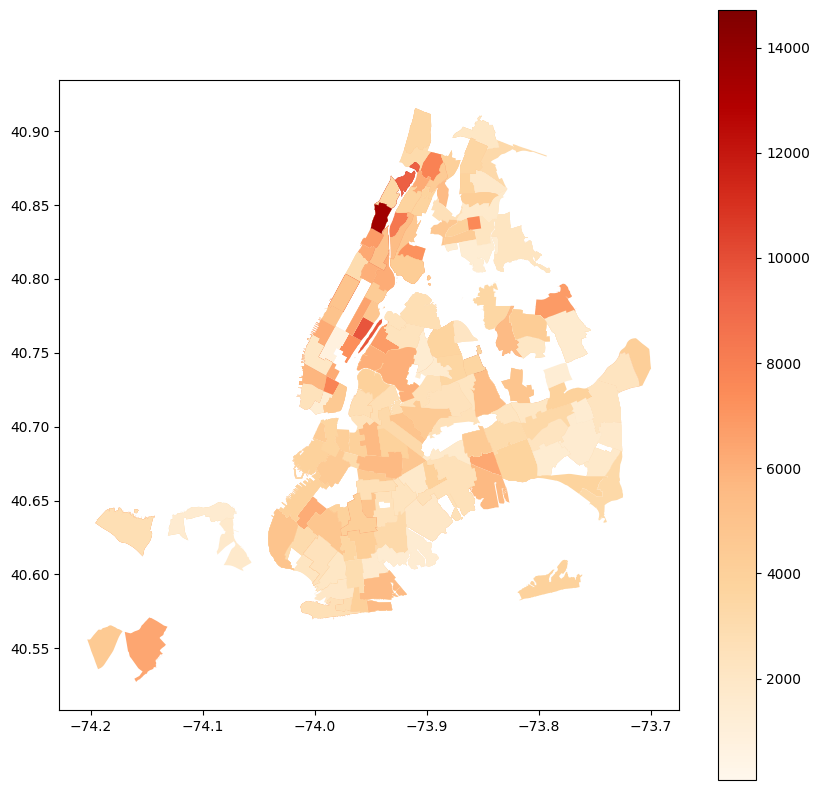

In [69]:
# Plot a choropleth map of the polygons based on a specific attribute
fig, ax = plt.subplots(figsize=(10, 10))
acs_nta.plot(column='total_population', cmap='OrRd', ax=ax, legend=True)
# centroids_gdf.plot(ax=ax, color='red', markersize=5)
plt.show()

In [70]:
# converting to csv
acs_nta.to_csv('acs_nta.csv', index=False)

In [3]:
file_path = 'C:/Users/sreya/Desktop/acs_nta_cleaned.csv'
acs_nta = pd.read_csv(file_path)

In [5]:
acs_nta.shape

(793, 81)

In [6]:
acs_nta.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area_left,shape_leng,geometry,index_right,comp2016,centract10,cenunits10,shape_area_right,comp2018,comp2011,comp2010,comp2019,withdrawn,total,objectid,comp2010ap,comp2014,adjunits10,comp2020,shape_length,comp2013,inactive,boro,permitted,comp2015,totaladj,approved,comp2012,comp2017,filed,bct2010,GEOID,d_Geographic Area Name,d_Total population,d_tot_male_pop,d_tot_female_pop,d_Under 5 years,d_5 to 9 years,d_10 to 14 years,d_15 to 19 years,d_20 to 24 years,d_25 to 29 years,d_30 to 34 years,d_35 to 39 years,d_40 to 44 years,d_45 to 49 years,d_50 to 54 years,d_55 to 59 years,d_60 to 64 years,d_65 to 69 years,d_70 to 74 years,d_75 to 79 years,d_80 to 84 years,d_85 years and over,total_population,white_no_lat,black_no_lat,native_no_lat,asian_no_lat,pacific_no_lat,other_race_no_lat,two_or_more_no_lat,hispanic_or_latino,males,median_age,household_number,family_households_number,median_income,gini_income_ineq,total_workers,poverty_status,income_per_capita,state,county,tract,centroid
0,4,Queens,81,QN08,St. Albans,77412747.85,45401.3168,POLYGON ((-73.75205066516907 40.70522802751699...,601.0,1.0,3.608104e+10,789.0,6514380.332,1.0,0.0,0.0,1.0,7.0,803.0,836.0,0.0,4.0,789.0,NaN,13006.674880,2.0,4.0,Queens,6.0,2.0,803.0,NaN,4.0,-1.0,5.0,4035200.0,3.608104e+10,"Census Tract 352, Queens County, New York",2949.0,1222.0,1727.0,192.0,202.0,127.0,262.0,154.0,122.0,216.0,183.0,172.0,113.0,267.0,183.0,375.0,51.0,242.0,31.0,16.0,41.0,2780.0,176.0,2227.0,0.0,80.0,0.0,29.0,69.0,199.0,1197.0,38.8,815.0,602.0,36964.0,0.3971,1301.0,2774.0,30465.0,36.0,81.0,35200.0,POINT (-73.75761133820669 40.67948545936228)
1,4,Queens,81,QN08,St. Albans,77412747.85,45401.3168,POLYGON ((-73.75205066516907 40.70522802751699...,1002.0,1.0,3.608103e+10,521.0,1960739.136,19.0,3.0,NaN,1.0,3.0,548.0,2015.0,NaN,NaN,521.0,1.0,7043.592374,2.0,2.0,Queens,1.0,NaN,548.0,4.0,1.0,-1.0,4.0,4028200.0,3.608103e+10,"Census Tract 282, Queens County, New York",2116.0,900.0,1216.0,274.0,134.0,133.0,156.0,208.0,151.0,71.0,108.0,148.0,167.0,51.0,217.0,133.0,50.0,34.0,12.0,30.0,39.0,1894.0,29.0,1444.0,0.0,87.0,0.0,192.0,50.0,92.0,915.0,36.5,528.0,401.0,32422.0,0.3940,839.0,1894.0,26675.0,36.0,81.0,28200.0,POINT (-73.77388476482244 40.68499910099614)
2,4,Queens,81,QN08,St. Albans,77412747.85,45401.3168,POLYGON ((-73.75205066516907 40.70522802751699...,1809.0,NaN,3.608104e+10,791.0,2510135.444,1.0,3.0,0.0,1.0,NaN,797.0,2017.0,0.0,0.0,791.0,0.0,6421.129329,1.0,0.0,Queens,NaN,NaN,797.0,NaN,2.0,-2.0,NaN,4036800.0,3.608104e+10,"Census Tract 368, Queens County, New York",2692.0,1213.0,1479.0,162.0,198.0,89.0,176.0,135.0,173.0,254.0,177.0,172.0,85.0,305.0,196.0,202.0,78.0,92.0,44.0,71.0,83.0,2495.0,22.0,2182.0,0.0,0.0,0.0,0.0,60.0,231.0,1136.0,41.6,808.0,602.0,38425.0,0.4558,1107.0,2495.0,32387.0,36.0,81.0,36800.0,POINT (-73.76648311119598 40.68533408705708)
3,4,Queens,81,QN08,St. Albans,77412747.85,45401.3168,POLYGON ((-73.75205066516907 40.70522802751699...,417.0,NaN,3.608104e+10,984.0,3986837.344,10.0,0.0,NaN,1.0,NaN,1006.0,1797.0,NaN,5.0,984.0,1.0,11239.187020,2.0,4.0,Queens,10.0,-1.0,1006.0,NaN,4.0,0.0,0.0,4036600.0,3.608104e+10,"Census Tract 366, Queens County, New York",2878.0,1415.0,1463.0,134.0,98.0,229.0,86.0,185.0,190.0,278.0,308.0,114.0,104.0,247.0,206.0,228.0,72.0,61.0,119.0,97.0,122.0,2731.0,17.0,2373.0,0.0,101.0,0.0,15.0,32.0,193.0,1313.0,41.1,999.0,643.0,36393.0,0.4579,1304.0,2722.0,30656.0,36.0,81.0,36600.0,POINT (-73.76309800611023 40.6856584447312)
4,4,Queens,81,QN08,St. Albans,77412747.85,45401.3168,POLYGON ((-73.75205066516907 40.70522802751699...,1442.0,0.0,3.608104e+10,1994.0,8230896.887,6.0,NaN,5.0,6.0,1.0,2022.0,951.0,5.0,1.0,1994.0,1.0,16756.183690,7.0,5.0,Queens,8.0,NaN,2022.0,3.0,NaN,2.0,1.0,4037600.0,3.608104e+10,"Census Tract 376, Queens County, New York",6794.0,2561.0,4233.0,524.0,306.0,385.0,488.0,516.0,515.0,458.0,509.0,410.0,266.0,356.0,702.0,567.0,299.0,132.0,144.0,78.0,139.0,6121.0,40.0,5565.0,13.0,75.0,0.0,177.0,25

In [7]:
acs_nta.columns

Index(['boro_code', 'boro_name', 'county_fip', 'ntacode', 'ntaname',
       'shape_area_left', 'shape_leng', 'geometry', 'index_right', 'comp2016',
       'centract10', 'cenunits10', 'shape_area_right', 'comp2018', 'comp2011',
       'comp2010', 'comp2019', 'withdrawn', 'total', 'objectid', 'comp2010ap',
       'comp2014', 'adjunits10', 'comp2020', 'shape_length', 'comp2013',
       'inactive', 'boro', 'permitted', 'comp2015', 'totaladj', 'approved',
       'comp2012', 'comp2017', 'filed', 'bct2010', 'GEOID',
       'd_Geographic Area Name', 'd_Total population', 'd_tot_male_pop',
       'd_tot_female_pop', 'd_Under 5 years', 'd_5 to 9 years',
       'd_10 to 14 years', 'd_15 to 19 years', 'd_20 to 24 years',
       'd_25 to 29 years', 'd_30 to 34 years', 'd_35 to 39 years',
       'd_40 to 44 years', 'd_45 to 49 years', 'd_50 to 54 years',
       'd_55 to 59 years', 'd_60 to 64 years', 'd_65 to 69 years',
       'd_70 to 74 years', 'd_75 to 79 years', 'd_80 to 84 years',
       'd_85 

In [15]:
acs_agg = acs_nta.groupby('ntacode').agg({'d_Total population': 'sum', 'd_Total population':'sum', 'd_tot_female_pop': 'sum', 
        'd_Under 5 years': 'sum', 'd_5 to 9 years': 'sum',
       'd_10 to 14 years': 'sum', 'd_15 to 19 years': 'sum', 'd_20 to 24 years': 'sum',
       'd_25 to 29 years': 'sum', 'd_30 to 34 years': 'sum', 'd_35 to 39 years': 'sum',
       'd_40 to 44 years': 'sum', 'd_45 to 49 years': 'sum', 'd_50 to 54 years': 'sum',
       'd_55 to 59 years': 'sum', 'd_60 to 64 years': 'sum', 'd_65 to 69 years': 'sum',
       'd_70 to 74 years': 'sum', 'd_75 to 79 years': 'sum', 'd_80 to 84 years': 'sum',
       'd_85 years and over': 'sum', 'total_population': 'sum', 'white_no_lat': 'sum',
       'black_no_lat': 'sum', 'native_no_lat': 'sum', 'asian_no_lat': 'sum', 'pacific_no_lat': 'sum',
       'other_race_no_lat': 'sum', 'two_or_more_no_lat': 'sum', 'hispanic_or_latino': 'sum',
        'median_age': 'mean', 'household_number':'mean', 'family_households_number':'mean',
       'median_income':'mean', 'gini_income_ineq':'mean', 'total_workers': 'mean', 'poverty_status': 'mean',
       'income_per_capita': 'mean'}).reset_index()

In [16]:
acs_agg.head()

,ntacode,d_Total population,d_tot_female_pop,d_Under 5 years,d_5 to 9 years,d_10 to 14 years,d_15 to 19 years,d_20 to 24 years,d_25 to 29 years,d_30 to 34 years,d_35 to 39 years,d_40 to 44 years,d_45 to 49 years,d_50 to 54 years,d_55 to 59 years,d_60 to 64 years,d_65 to 69 years,d_70 to 74 years,d_75 to 79 years,d_80 to 84 years,d_85 years and over,total_population,white_no_lat,black_no_lat,native_no_lat,asian_no_lat,pacific_no_lat,other_race_no_lat,two_or_more_no_lat,hispanic_or_latino,median_age,household_number,family_households_number,median_income,gini_income_ineq,total_workers,poverty_status,income_per_capita
0,BK09,4604.0,2612.0,219.0,134.0,68.0,720.0,532.0,237.0,361.0,308.0,322.0,237.0,208.0,246.0,150.0,334.0,87.0,43.0,134.0,264.0,4308.0,2968.0,175.0,10.0,469.0,9.0,0.0,192.0,485.0,32.60,1769.0,707.0,63519.00,0.485500,1956.00,3042.00,77106.0
1,BK17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BK19,4311.0,2615.0,122.0,35.0,201.0,173.0,148.0,40.0,260.0,280.0,239.0,258.0,80.0,245.0,210.0,192.0,468.0,324.0,350.0,686.0,4074.0,3681.0,15.0,0.0,81.0,0.0,0.0,281.0,16.0,62.10,2047.0,863.0,12228.00,0.544800,1163.00,4069.00,19662.0
3,BK21,18971.0,10552.0,1018.0,1192.0,1055.0,1656.0,1151.0,1208.0,1032.0,738.0,896.0,829.0,1293.0,1439.0,1192.0,1368.0,605.0,825.0,674.0,800.0,17532.0,4092.0,6213.0,50.0,1976.0,0.0,0.0,395.0,4806.0,46.55,1705.5,1063.0,15181.25,0.518475,1050.75,4234.25,19224.5
4,BK23,8754.0,4615.0,419.0,293.0,325.0,194.0,292.0,495.0,187.0,340.0,537.0,630.0,359.0,665.0,340.0,1091.0,769.0,763.0,623.0,432.0,8363.0,7494.0,172.0,0.0,137.0,6.0,0.0,349.0,205.0,59.95,2136.0,1232.5,20491.00,0.456000,1676.50,4181.50,27831.5


In [18]:
# converting to csv
acs_agg.to_csv('acs_nta_agg.csv', index=False)

In [12]:
%pwd

'C:\\Users\\sreya'

In [20]:
acs_agg.shape

(195, 38)

In [9]:
health_path = "C:/Users/sreya/Downloads/health_insurance/ACSST5Y2019.S2701-Data.csv"
healthdf = pd.read_csv(health_path)
healthdf.head()

,Geography,Geographic Area Name,Estimate!!Total!!Civilian noninstitutionalized population,Annotation of Estimate!!Total!!Civilian noninstitutionalized population,Margin of Error!!Total!!Civilian noninstitutionalized population,Annotation of Margin of Error!!Total!!Civilian noninstitutionalized population,Estimate!!Total!!Civilian noninstitutionalized population!!AGE!!Under 6 years,Annotation of Estimate!!Total!!Civilian noninstitutionalized population!!AGE!!Under 6 years,Margin of Error!!Total!!Civilian noninstitutionalized population!!AGE!!Under 6 years,Annotation of Margin of Error!!Total!!Civilian noninstitutionalized population!!AGE!!Under 6 years,Estimate!!Total!!Civilian noninstitutionalized population!!AGE!!6 to 18 years,Annotation of Estimate!!Total!!Civilian noninstitutionalized population!!AGE!!6 to 18 years,Margin of Error!!Total!!Civilian noninstitutionalized population!!AGE!!6 to 18 years,Annotation of Margin of Error!!Total!!Civilian noninstitutionalized population!!AGE!!6 to 18 years,Estimate!!Total!!Civilian noninstitutionalized population!!AGE!!19 to 25 years,Annotation of Estimate!!Total!!Civilian noninstitutionalized population!!AGE!!19 to 25 years,Margin of Error!!Total!!Civilian noninstitutionalized population!!AGE!!19 to 25 years,Annotation of Margin of Error!!Total!!Civilian noninstitutionalized population!!AGE!!19 to 25 years,Estimate!!Total!!Civilian noninstitutionalized population!!AGE!!26 to 34 years,Annotation of Estimate!!Total!!Civilian noninstitutionalized population!!AGE!!26 to 34 years,Margin of Error!!Total!!Civilian noninstitutionalized population!!AGE!!26 to 34 years,Annotation of Margin of Error!!Total!!Civilian noninstitutionalized population!!AGE!!26 to 34 years,Estimate!!Total!!Civilian noninstitutionalized population!!AGE!!35 to 44 years,Annotation of Estimate!!Total!!Civilian noninstitutionalized population!!AGE!!35 to 44 years,Margin of Error!!Total!!Civilian noninstitutionalized population!!AGE!!35 to 44 years,Annotation of Margin of Error!!Total!!Civilian noninstitutionalized population!!AGE!!35 to 44 years,Estimate!!Total!!Civilian noninstitutionalized population!!AGE!!45 to 54 years,Annotation of Estimate!!Total!!Civilian noninstitutionalized population!!AGE!!45 to 54 years,Margin of Error!!Total!!Civilian noninstitutionalized population!!AGE!!45 to 54 years,Annotation of Margin of Error!!Total!!Civilian noninstitutionalized population!!AGE!!45 to 54 years,Estimate!!Total!!Civilian noninstitutionalized population!!AGE!!55 to 64 years,Annotation of Estimate!!Total!!Civilian noninstitutionalized population!!AGE!!55 to 64 years,Margin of Error!!Total!!Civilian noninstitutionalized population!!AGE!!55 to 64 years,Annotation of Margin of Error!!Total!!Civilian noninstitutionalized population!!AGE!!55 to 64 years,Estimate!!Total!!Civilian noninstitutionalized population!!AGE!!65 to 74 years,Annotation of Estimate!!Total!!Civilian noninstitutionalized population!!AGE!!65 to 74 years,Margin of Error!!Total!!Civilian noninstitutionalized population!!AGE!!65 to 74 years,Annotation of Margin of Error!!Total!!Civilian noninstitutionalized population!!AGE!!65 to 74 years,Estimate!!Total!!Civilian noninstitutionalized population!!AGE!!75 years and older,Annotation of Estimate!!Total!!Civilian noninstitutionalized population!!AGE!!75 years and older,Margin of Error!!Total!!Civilian noninstitutionalized population!!AGE!!75 years and older,Annotation of Margin of Error!!Total!!Civilian noninstitutionalized population!!AGE!!75 years and older,Estimate!!Total!!Civilian noninstitutionalized population!!AGE!!Under 19 years,Annotation of Estimate!!Total!!Civilian noninstitutionalized population!!AGE!!Under 19 years,Margin of Error!!Total!!Civilian noninstitutionalized population!!AGE!!Under 19 years,Annotation of Margin of Error!!Total!!Civilian noninstitutionalized population!!AGE!!Under 19 years,Estimate!!Total!!Civilian noninstitutionalized population!!AGE!!19 to 64 years,Annotation of Estimate!!Tot

In [12]:
# "C:\Users\sreya\Downloads\industry_by_sex\ACSST5Y2019.S2403-Column-Data.csv"

industry_pop = "C:/Users/sreya/Downloads/industry_by_sex/ACSST5Y2019.S2403-Data.csv"
industrydf = pd.read_csv(industry_pop)
industrydf.head()

,Geography,Geographic Area Name,Estimate!!Total!!Civilian employed population 16 years and over,Annotation of Estimate!!Total!!Civilian employed population 16 years and over,Margin of Error!!Total!!Civilian employed population 16 years and over,Annotation of Margin of Error!!Total!!Civilian employed population 16 years and over,"Estimate!!Total!!Civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining:","Annotation of Estimate!!Total!!Civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining:","Margin of Error!!Total!!Civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining:","Annotation of Margin of Error!!Total!!Civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining:","Estimate!!Total!!Civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining:!!Agriculture, forestry, fishing and hunting","Annotation of Estimate!!Total!!Civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining:!!Agriculture, forestry, fishing and hunting","Margin of Error!!Total!!Civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining:!!Agriculture, forestry, fishing and hunting","Annotation of Margin of Error!!Total!!Civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining:!!Agriculture, forestry, fishing and hunting","Estimate!!Total!!Civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining:!!Mining, quarrying, and oil and gas extraction","Annotation of Estimate!!Total!!Civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining:!!Mining, quarrying, and oil and gas extraction","Margin of Error!!Total!!Civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining:!!Mining, quarrying, and oil and gas extraction","Annotation of Margin of Error!!Total!!Civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining:!!Mining, quarrying, and oil and gas extraction",Estimate!!Total!!Civilian employed population 16 years and over!!Construction,Annotation of Estimate!!Total!!Civilian employed population 16 years and over!!Construction,Margin of Error!!Total!!Civilian employed population 16 years and over!!Construction,Annotation of Margin of Error!!Total!!Civilian employed population 16 years and over!!Construction,Estimate!!Total!!Civilian employed population 16 years and over!!Manufacturing,Annotation of Estimate!!Total!!Civilian employed population 16 years and over!!Manufacturing,Margin of Error!!Total!!Civilian employed population 16 years and over!!Manufacturing,Annotation of Margin of Error!!Total!!Civilian employed population 16 years and over!!Manufacturing,Estimate!!Total!!Civilian employed population 16 years and over!!Wholesale trade,Annotation of Estimate!!Total!!Civilian employed population 16 years and over!!Wholesale trade,Margin of Error!!Total!!Civilian employed population 16 years and over!!Wholesale trade,Annotation of Margin of Error!!Total!!Civilian employed population 16 years and over!!Wholesale trade,Estimate!!Total!!Civilian employed population 16 years and over!!Retail trade,Annotation of Estimate!!Total!!Civilian employed population 16 years and over!!Retail trade,Margin of Error!!Total!!Civilian employed population 16 years and over!!Retail trade,Annotation of Margin of Error!!Total!!Civilian employed population 16 years and over!!Retail trade,"Estimate!!Total!!Civilian employed population 16 years and over!!Transportation and warehousing, and utilities:","Margin of Error!!Total!!Civilian employed population 16 years and over!!Transportation and warehousing, and utilities:","Annotation of Margin of Error!!Total

In [16]:
import re
filtered_inddf = industrydf.filter(regex=re.compile(r'^Estimate!!Total!!(?!.*\b(suffix)\b).*'))
filtered_inddf.columns

Index(['Estimate!!Total!!Civilian employed population 16 years and over',
       'Estimate!!Total!!Civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining:',
       'Estimate!!Total!!Civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining:!!Agriculture, forestry, fishing and hunting',
       'Estimate!!Total!!Civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining:!!Mining, quarrying, and oil and gas extraction',
       'Estimate!!Total!!Civilian employed population 16 years and over!!Construction',
       'Estimate!!Total!!Civilian employed population 16 years and over!!Manufacturing',
       'Estimate!!Total!!Civilian employed population 16 years and over!!Wholesale trade',
       'Estimate!!Total!!Civilian employed population 16 years and over!!Retail trade',
       'Estimate!!Total!!Civilian employed population 16 years and over!!Transportatio

In [10]:
col = healthdf.columns.to_list()
print(col)

['Geography', 'Geographic Area Name', 'Estimate!!Total!!Civilian noninstitutionalized population', 'Annotation of Estimate!!Total!!Civilian noninstitutionalized population', 'Margin of Error!!Total!!Civilian noninstitutionalized population', 'Annotation of Margin of Error!!Total!!Civilian noninstitutionalized population', 'Estimate!!Total!!Civilian noninstitutionalized population!!AGE!!Under 6 years', 'Annotation of Estimate!!Total!!Civilian noninstitutionalized population!!AGE!!Under 6 years', 'Margin of Error!!Total!!Civilian noninstitutionalized population!!AGE!!Under 6 years', 'Annotation of Margin of Error!!Total!!Civilian noninstitutionalized population!!AGE!!Under 6 years', 'Estimate!!Total!!Civilian noninstitutionalized population!!AGE!!6 to 18 years', 'Annotation of Estimate!!Total!!Civilian noninstitutionalized population!!AGE!!6 to 18 years', 'Margin of Error!!Total!!Civilian noninstitutionalized population!!AGE!!6 to 18 years', 'Annotation of Margin of Error!!Total!!Civilia

In [ ]:
cols_industry = ['Geography', 'Estimate!!Total!!Civilian employed population 16 years and over', 'Estimate!!Total!!Civilian employed population 16 years and over!!Construction',
       'Estimate!!Total!!Civilian employed population 16 years and over!!Manufacturing', 
       'Estimate!!Total!!Civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining:!!Mining, quarrying, and oil and gas extraction',
        'Estimate!!Total!!Civilian employed population 16 years and over!!Professional, scientific, and management, and administrative and waste management services:!!Administrative and support and waste management services']


In [ ]:
cols_health = ['Geography', 'Estimate!!Total!!Civilian noninstitutionalized population','Estimate!!Insured!!Civilian noninstitutionalized population',  ]
